# 2) IACOV - Model Development for Prognosis - DEATH
## Strategy 1) Training using one hospital data anda testing with 30% of the same hospital

First we import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

In C:\Users\1511 MXTI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\1511 MXTI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\1511 MXTI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\1511 MXTI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\1511 MXTI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylel

In [2]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_en.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(8494, 65)

In [3]:
df_iacov_model.columns

Index(['city_hospital', 'cd_patient', 'hospital_time', 'age', 'race', 'braden',
       'heart_rate', 'resp_rate', 'sys_press', 'dias_press', 'mean_press',
       'temp', 'saturation', 'weight', 'height', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'neutr_lymph_ratio', 'lymph_crp_ratio',
       'basophils', 'eosinophils', 'monocytes', 'crp', 'albumin', 'ldh', 'alt',
       'ast', 'total_bilirubin', 'direct_bilirubin', 'indirect_bilirubin',
       'urea', 'sodium', 'potassium', 'creatinine', 'troponin', 'd_dimer',
       'venous_lactate', 'cpk', 'inr', 'aptt', 'arterial_lactate', 'gas_ph',
       'gaso_po2', 'gas_paco2', 'gas_hco3', 'gas_be', 'gas_so2', 'magnesium',
       'calcium_ionised', 'total_calcium', 'glucose', 'state', 'region', 'icu',
       'death', 'mv', 'male'],
      dtype='object')

In [6]:
df_iacov_model.iloc[:,2:65].head(5)

,hospital_time,age,race,braden,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,...,magnesium,calcium_ionised,total_calcium,glucose,state,region,icu,death,mv,male
0,10.000,56.000,Pardo,nan,89.000,23.000,130.000,80.000,96.650,36.500,...,nan,nan,nan,nan,AM,NORTE,1,0,1,1.000
1,10.000,61.000,Pardo,nan,86.000,18.000,172.000,75.000,107.301,34.800,...,2.100,1.150,nan,nan,AM,NORTE,1,1,1,1.000
2,79.000,28.000,Pardo,nan,80.000,30.000,117.000,56.000,76.313,37.400,...,2.500,1.210,7.280,nan,AM,NORTE,1,0,1,1.000
3,15.000,69.000,Pardo,nan,68.000,nan,149.000,81.000,103.644,37.300,...,nan,nan,nan,nan,AM,NORTE,0,0,0,0.000
4,16.000,66.000,Pardo,nan,67.000,nan,124.000,75.000,91.317,36.600,...,2.100,nan,7.770,nan,AM,NORTE,1,0,1,1.000


## 2.1) Assign binary outcome to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [7]:
#22 predictors + outcome
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'death']]
df_iacov_model_lean.shape

(8494, 24)

In [8]:
#df_iacov_model_lean.city_hospital.value_counts()

Saved only the features to be used in the model

In [11]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

In [13]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(8494, 24)

Basis statistics

In [14]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,19,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,98,0,float64,-0.114,8494.000,58.385,17.287,18.000,45.000,59.000,71.000,105.000
male,1,0.012,2,3814,float64,-0.205,8493.000,0.551,0.497,0.000,0.000,1.000,1.000,1.000
heart_rate,2654,31.246,184,0,float64,0.609,5840.000,86.017,17.388,13.000,75.000,85.000,96.000,233.000
resp_rate,3368,39.652,74,1,float64,6.066,5126.000,21.989,7.064,0.000,18.000,20.000,24.000,202.000
sys_press,3211,37.803,220,0,float64,70.917,5283.000,126.629,179.854,10.000,110.000,122.000,138.000,13090.000
dias_press,3202,37.697,155,0,float64,17.255,5292.000,74.777,18.972,6.000,67.000,76.000,81.000,931.000
mean_press,3644,42.901,1456,326,float64,-1.719,4850.000,83.867,28.192,0.000,78.977,90.000,98.500,235.000
temp,3115,36.673,129,1,float64,65.829,5379.000,36.438,4.744,0.000,36.000,36.300,36.800,372.000
hemoglobin,1984,23.358,250,0,float64,17.184,6510.000,12.766,3.096,1.400,11.500,13.000,14.300,133.000


In [16]:
import ipywidgets as widgets
from IPython.display import clear_output

In [17]:
#df_all_hospitals.city_hospital.value_counts()

Renaming hospitals to state that they are located. <br />
Ommited code below due to confidenciality purposes

In [19]:
specific_hospital = 'Choose a hospital ...'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

#     df_iacov_model_lean[df_iacov_model_lean.city_hospital == specific_hospital].shape

In [20]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train** <br/>
Training all hospitals with only hospital data

Code omitted due to confidenciality

In [23]:
df_single_hospital = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_single_hospital.shape

(1776, 24)

In [25]:
column_summaries(df_single_hospital)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,1,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,81,0,float64,-0.193,1776.000,59.467,15.136,19.000,49.000,60.000,71.000,99.000
male,0,0.000,2,697,float64,-0.441,1776.000,0.608,0.488,0.000,0.000,1.000,1.000,1.000
heart_rate,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
resp_rate,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
sys_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
dias_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
mean_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
temp,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
hemoglobin,67,3.773,134,0,float64,-0.621,1709.000,12.821,2.436,3.300,11.500,13.200,14.500,21.100


### 2.1.3) Dropping unused variables

In [26]:
df_single_hospital = df_single_hospital.drop(['city_hospital'],axis=1)
df_single_hospital.shape

(1776, 23)

In [27]:
#Fill NAs with 0 
df_single_hospital['death'] = df_single_hospital['death'].fillna(0)
df_single_hospital.death.value_counts()

0    1038
1     738
Name: death, dtype: int64

In [28]:
(df_single_hospital.death.value_counts()/len(df_single_hospital))*100

0   58.446
1   41.554
Name: death, dtype: float64

In [29]:
df_single_hospital['class'] = df_single_hospital['death'].astype('int')
df_single_hospital = df_single_hospital.drop(['death'],axis=1)
df_single_hospital.head()

,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,...,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,class
5628,55.000,0.000,nan,nan,nan,nan,nan,nan,11.100,316000.000,...,12.500,91.000,16900.000,nan,1352.000,nan,nan,507.000,nan,0
5629,74.000,1.000,nan,nan,nan,nan,nan,nan,17.100,67000.000,...,13.100,88.400,5400.000,4595.000,659.000,11.000,nan,135.000,nan,1
5630,38.000,1.000,nan,nan,nan,nan,nan,nan,14.600,281000.000,...,13.000,89.000,8500.000,nan,680.000,nan,nan,255.000,nan,0
5631,55.000,1.000,nan,nan,nan,nan,nan,nan,16.200,198000.000,...,13.700,95.500,12300.000,nan,615.000,nan,nan,246.000,nan,0
5632,32.000,1.000,nan,nan,nan,nan,nan,nan,14.200,463000.000,...,12.800,81.100,13900.000,nan,1112.000,nan,nan,695.000,nan,0


### 2.1.4) Recalculating null mean_press

In [30]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [31]:
#Check mean_press missing before recalculating
column_summaries(df_single_hospital)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,81,0,float64,-0.193,1776.000,59.467,15.136,19.000,49.000,60.000,71.000,99.000
male,0,0.000,2,697,float64,-0.441,1776.000,0.608,0.488,0.000,0.000,1.000,1.000,1.000
heart_rate,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
resp_rate,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
sys_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
dias_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
mean_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
temp,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
hemoglobin,67,3.773,134,0,float64,-0.621,1709.000,12.821,2.436,3.300,11.500,13.200,14.500,21.100
platelets,69,3.885,600,0,float64,0.352,1707.000,195571.852,130237.679,5.000,116500.000,199000.000,274500.000,791000.000


In [32]:
df_single_hospital['mean_press'] = df_single_hospital.apply(isNullMeanPressure, axis=1)

In [33]:
#Check mean_press missing after recalculating
column_summaries(df_single_hospital)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,81,0,float64,-0.193,1776.000,59.467,15.136,19.000,49.000,60.000,71.000,99.000
male,0,0.000,2,697,float64,-0.441,1776.000,0.608,0.488,0.000,0.000,1.000,1.000,1.000
heart_rate,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
resp_rate,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
sys_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
dias_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
mean_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
temp,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
hemoglobin,67,3.773,134,0,float64,-0.621,1709.000,12.821,2.436,3.300,11.500,13.200,14.500,21.100
platelets,69,3.885,600,0,float64,0.352,1707.000,195571.852,130237.679,5.000,116500.000,199000.000,274500.000,791000.000


## 2.2) Prepare Experiment

1. First, create your experiment 

In [35]:
df_single_hospital.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

In [36]:
df_single_hospital.shape

(1776, 23)

In [37]:
#import inspect
#inspect.getsource(setup)

__Atention!__: If any Dtype is bool, cast to int32, otherwise experiment will fail

In [38]:
df_single_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 5628 to 7403
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1776 non-null   float64
 1   male             1776 non-null   float64
 2   heart_rate       0 non-null      float64
 3   resp_rate        0 non-null      float64
 4   sys_press        0 non-null      float64
 5   dias_press       0 non-null      float64
 6   mean_press       0 non-null      float64
 7   temp             0 non-null      float64
 8   hemoglobin       1709 non-null   float64
 9   platelets        1707 non-null   float64
 10  hematocrit       1709 non-null   float64
 11  red_cells_count  1418 non-null   float64
 12  hcm              1709 non-null   float64
 13  rdw              1709 non-null   float64
 14  mcv              1709 non-null   float64
 15  leukocytes       1709 non-null   float64
 16  neutrophil       1355 non-null   float64
 17  lymphocytes

In [39]:
df_single_hospital.shape

(1776, 23)

**Missing columns**

In [40]:
# df_iacov_model_lean.eosinophils.value_counts()

In [41]:
# df_iacov_model_lean.red_cells_count.value_counts()

In [42]:
df_single_hospital.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

In [43]:
df_single_hospital.shape

(1776, 23)

In [44]:
# from sklearn.model_selection import train_test_split
# X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(df_iacov_model_lean.loc[:, df_iacov_model_lean.columns != 'class'], df_iacov_model_lean['class'], test_size=0.30, random_state=42, stratify=df_iacov_model_lean['class'])
# X_test_specific.shape

In [45]:
from imblearn.under_sampling import EditedNearestNeighbours

exp = setup(df_single_hospital, target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit','heart_rate','resp_rate','sys_press','dias_press','mean_press','temp']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 0.70 #Default: 0.70
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1776, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [46]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [47]:
seed

42

In [48]:
X_train.head(5)

,age,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,male_1.0
0,0.167,-1.312,0.684,-1.526,-1.714,0.457,0.579,-0.178,-0.495,-0.068,-0.129,-0.106,-0.261,-0.161,0.000
1,0.894,0.027,-0.671,-0.001,0.010,-0.169,0.230,-0.255,-0.117,0.307,0.299,-0.018,-0.261,-0.768,1.000
2,-1.220,0.153,0.026,0.126,0.094,0.040,-0.218,0.008,-0.103,-0.068,-0.129,-0.106,-0.261,-0.161,1.000
3,-0.427,-1.730,0.190,-1.766,-1.532,-1.337,-0.069,-1.540,-0.222,-0.277,-0.163,1.473,0.799,0.482,1.000
4,1.225,0.278,1.029,0.761,0.515,-0.586,1.476,0.473,0.494,-0.068,-0.607,-0.106,-0.261,1.379,1.000


In [49]:
X_test.head(5)

,age,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,male_1.0
5959,0.432,1.240,0.386,1.227,0.837,0.791,-0.118,0.829,0.121,1.423,0.475,-0.106,-0.261,-0.064,1.000
6979,0.233,0.529,1.287,0.719,1.454,-1.587,0.280,-1.416,-0.122,-0.068,0.566,6.561,1.560,-0.902,1.000
7146,0.035,-0.015,-1.531,-0.058,0.094,-0.461,0.380,-0.642,0.062,-1.515,-1.225,-0.799,-0.376,-1.152,0.000
6938,1.291,0.571,-0.194,0.521,0.332,0.415,-0.118,0.318,-0.098,0.360,0.015,-0.018,-0.261,0.360,0.000
6514,-1.353,1.868,1.123,1.721,1.706,0.457,-0.766,0.148,-0.117,0.221,0.456,-0.018,-0.273,-0.070,1.000


In [50]:
X_train.shape

(1452, 15)

In [51]:
X_test.shape

(533, 15)

In [52]:
X_test.shape

(533, 15)

code omitted due to confidentiality

In [54]:
x_test_specific_name = 'X_test_' + 'baseline_' + specific_hospital +  ".csv"

In [55]:
y_test_specific_name = 'y_death_' + 'baseline_' + specific_hospital + ".csv"

In [56]:
X_test.to_csv(x_test_specific_name, sep=';')
X_test.shape

(533, 15)

In [57]:
X_test.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0'],
      dtype='object')

In [58]:
y_test.to_csv(y_test_specific_name, sep=';')
y_test.shape

(533,)

### Filtering only 5 pre-selected models (Check training metrics)
Using only modes that support nan

In [59]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
# compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","mlp","ridge","qda","ada","gbc","lda", "rf" ,"et"] , turbo = False)
# compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","lightgbm"] , turbo = False)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.758300,0.848100,0.781900,0.734100,0.743000,0.758900,0.516400,0.000000,0.016700,0.324200
1,CatBoost Classifier,0.754900,0.845400,0.775200,0.734100,0.743500,0.757300,0.509500,0.233800,0.550900,0.356300
2,Light Gradient Boosting Machine,0.770000,0.842200,0.790200,0.749300,0.758400,0.770400,0.539800,0.000300,0.240600,0.336500


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [60]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.712,0.828,0.685,0.740,0.725,0.704,0.425,0.000,0.000,0.195
1,0.767,0.820,0.781,0.753,0.760,0.770,0.534,0.000,0.000,0.226
2,0.724,0.817,0.736,0.712,0.716,0.726,0.448,0.000,0.000,0.234
3,0.772,0.856,0.806,0.740,0.753,0.778,0.545,0.000,0.000,0.328
4,0.745,0.780,0.694,0.794,0.769,0.730,0.489,0.000,0.000,0.143
5,0.731,0.800,0.736,0.726,0.726,0.731,0.462,0.000,0.000,0.183
6,0.745,0.853,0.794,0.694,0.725,0.758,0.489,0.000,0.000,0.286
7,0.855,0.935,0.973,0.736,0.789,0.871,0.710,0.000,0.011,0.580
8,0.848,0.980,1.000,0.694,0.768,0.869,0.696,0.000,0.029,0.587
9,0.876,0.940,1.000,0.750,0.802,0.890,0.751,0.000,0.000,0.557


In [64]:
cattuned.feature_names_

['age',
 'hemoglobin',
 'platelets',
 'hematocrit',
 'red_cells_count',
 'hcm',
 'rdw',
 'mcv',
 'leukocytes',
 'neutrophil',
 'lymphocytes',
 'basophils',
 'eosinophils',
 'monocytes',
 'male_1.0']

In [62]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.712,0.796,0.740,0.685,0.701,0.720,0.425,0.000,0.000,0.084
1,0.774,0.826,0.794,0.753,0.763,0.778,0.548,0.000,0.000,0.224
2,0.703,0.771,0.778,0.630,0.675,0.723,0.407,0.000,0.000,0.050
3,0.779,0.862,0.819,0.740,0.756,0.787,0.559,0.000,0.000,0.302
4,0.724,0.788,0.722,0.726,0.722,0.722,0.448,0.000,0.000,0.115
5,0.745,0.815,0.792,0.699,0.722,0.755,0.490,0.000,0.000,0.186
6,0.738,0.859,0.808,0.667,0.711,0.756,0.475,0.000,0.000,0.220
7,0.828,0.935,0.959,0.694,0.761,0.849,0.654,0.000,0.000,0.471
8,0.800,0.966,1.000,0.597,0.716,0.834,0.599,0.000,0.000,0.392
9,0.835,0.966,1.000,0.667,0.753,0.859,0.668,0.000,0.000,0.451


In [63]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.671,0.766,0.767,0.575,0.644,0.700,0.343,0.000,0.000,0.116
1,0.760,0.831,0.863,0.657,0.716,0.783,0.520,0.003,0.017,0.295
2,0.710,0.781,0.819,0.603,0.670,0.738,0.421,0.000,0.000,0.170
3,0.765,0.862,0.847,0.685,0.726,0.782,0.531,0.144,0.030,0.352
4,0.648,0.773,0.750,0.548,0.621,0.679,0.297,0.000,0.000,0.162
5,0.724,0.815,0.833,0.616,0.682,0.750,0.449,0.000,0.000,0.230
6,0.710,0.851,0.836,0.583,0.670,0.744,0.420,0.000,0.000,0.255
7,0.814,0.915,0.986,0.639,0.735,0.842,0.627,0.000,0.256,0.456
8,0.779,0.944,1.000,0.556,0.695,0.820,0.557,0.000,0.048,0.413
9,0.814,0.927,1.000,0.625,0.730,0.844,0.627,0.000,0.035,0.421


### Select best algorithm based on test data AUC

In [65]:
preds = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.647,0.697,0.525,0.734,0.583,0.552,0.263,0.000,0.000,-0.079


In [66]:
preds = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.640,0.693,0.674,0.615,0.554,0.608,0.281,0.000,0.000,-0.177


In [67]:
preds = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.651,0.706,0.738,0.590,0.560,0.637,0.313,0.000,0.000,-0.043


In [80]:
xgbtuned

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.105, max_delta_step=0, max_depth=7,
              min_child_weight=3.0, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-2, num_parallel_tree=1, random_state=42,
              reg_alpha=1.0, reg_lambda=1, scale_pos_weight=3, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [69]:
xgbtuned

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.105, max_delta_step=0, max_depth=7,
              min_child_weight=3.0, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-2, num_parallel_tree=1, random_state=42,
              reg_alpha=1.0, reg_lambda=1, scale_pos_weight=3, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [81]:
#cattuned.get_params()

### Understand best algorithm features and results

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.651,0.706,0.738,0.590,0.560,0.637,0.313,0.000,0.000,-0.043


,,
,,
Ground Truth Prevalence,. . .,0.415
Test set Prevalence,. . .,0.546
True positive rate (recall),. . .,0.738
False positive rate,. . .,0.410
Positive predictive value (precision),. . .,0.560
True negative rate (specificity),. . .,0.590
False negative rate,. . .,0.262
Negative predictive value,. . .,0.760
Positive likelihood ratio (bigger is better),. . .,1.798


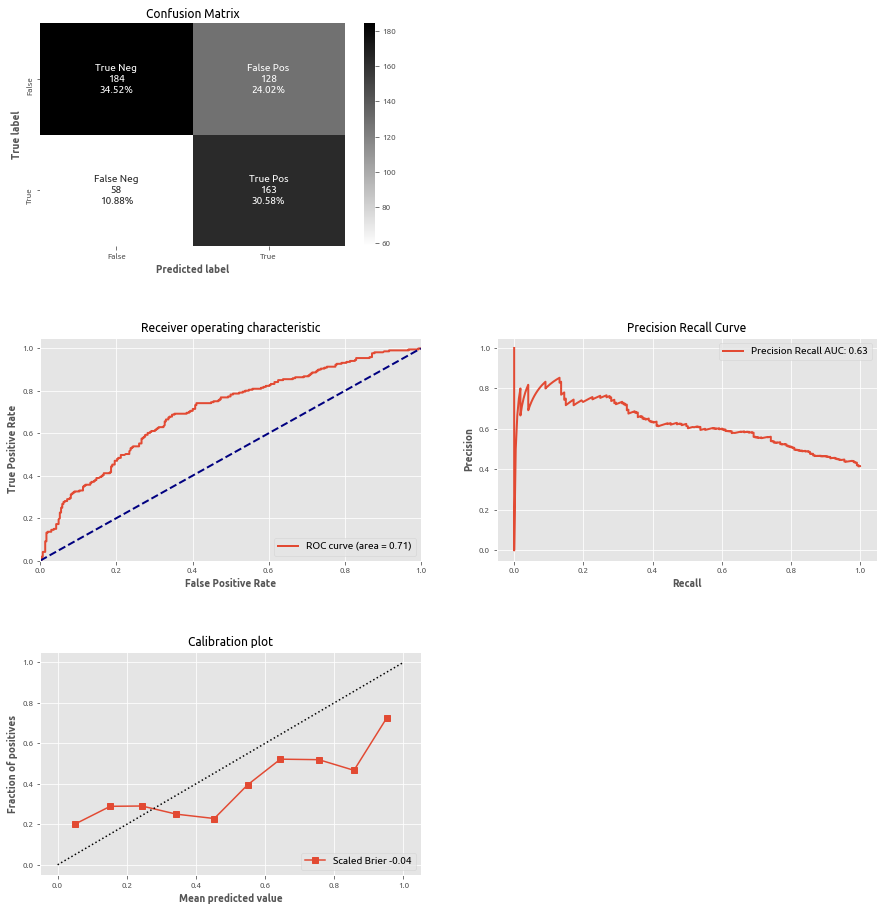

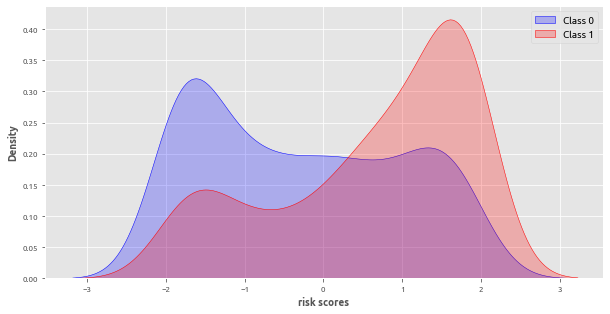

,,
,,
Ground Truth Prevalence,. . .,0.415
Test set Prevalence,. . .,0.546
True positive rate (recall),. . .,0.738
False positive rate,. . .,0.410
Positive predictive value (precision),. . .,0.560
True negative rate (specificity),. . .,0.590
False negative rate,. . .,0.262
Negative predictive value,. . .,0.760
Positive likelihood ratio (bigger is better),. . .,1.798


In [82]:
preds = predict_model(xgbtuned)
preds
binary_classification_metrics(y_test, preds['Label'], preds['Score'])

In [83]:
preds['Label'].to_csv(y_test_specific_name, sep=';')
#y_test_specific_name

In [84]:
y_test_specific_name_score = y_test_specific_name.replace(".csv","_score") + '.csv'
preds['Score'].to_csv(y_test_specific_name_score, sep=';')
#y_test_specific_name_score

In [85]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'])]

['0.66', '0.75']

In [86]:
npv(y_test, preds['Label'])

0.7603305785123967

In [87]:
ppv(y_test, preds['Label'])

0.5601374570446735

In [89]:
#evaluate_model(xgbtuned)

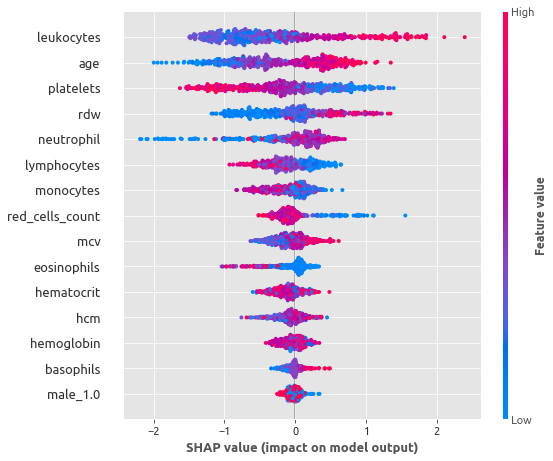

In [90]:
interpret_model(xgbtuned)

In [70]:
# plot_model(xgbtuned, plot='ktops')

In [48]:
# cattuned

### 2.3.1) Build a model with all data

In [91]:
final_model = finalize_model(xgbtuned)

### 2.3.2) Using model to predict unseen outcome

In [92]:
preds = predict_model(xgbtuned)
preds

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.651,0.706,0.738,0.590,0.560,0.637,0.313,0.000,0.000,-0.043


,age,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,male_1.0,class,Label,Score
0,0.432,1.240,0.386,1.227,0.837,0.791,-0.118,0.829,0.121,1.423,0.475,-0.106,-0.261,-0.064,1.000,1,1,0.775
1,0.233,0.529,1.287,0.719,1.454,-1.587,0.280,-1.416,-0.122,-0.068,0.566,6.561,1.560,-0.902,1.000,0,0,0.218
2,0.035,-0.015,-1.531,-0.058,0.094,-0.461,0.380,-0.642,0.062,-1.515,-1.225,-0.799,-0.376,-1.152,0.000,0,1,0.685
3,1.291,0.571,-0.194,0.521,0.332,0.415,-0.118,0.318,-0.098,0.360,0.015,-0.018,-0.261,0.360,0.000,1,1,0.887
4,-1.353,1.868,1.123,1.721,1.706,0.457,-0.766,0.148,-0.117,0.221,0.456,-0.018,-0.273,-0.070,1.000,0,0,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,-0.758,1.031,1.052,0.945,1.342,-0.502,-0.168,-0.766,0.067,1.282,0.032,1.298,-0.261,-0.899,1.000,0,0,0.098
529,1.621,1.199,-0.593,1.156,1.005,0.415,0.031,0.333,0.101,-0.068,-0.254,-0.106,-0.261,0.808,1.000,1,1,0.977
530,0.233,-2.274,0.653,-2.189,-2.668,0.165,-0.218,0.705,0.076,1.105,0.396,1.385,1.341,0.696,0.000,1,1,0.607
531,1.489,-0.140,-1.532,-0.396,0.094,1.500,-0.517,0.922,0.042,-1.515,-1.233,-0.790,-0.373,-1.136,1.000,1,1,0.940


In [93]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'])]

['0.66', '0.75']

In [95]:
# fpr_baseline , tpr_baseline, thresholds_baseline = roc_curve(y_test, preds['Score'])
# auc_baseline = auc(fpr_baseline, tpr_baseline)
# auc_baseline

In [96]:
str(final_model.__class__.__name__)

'XGBClassifier'

In [98]:
tuned_model_name = str(final_model.__class__.__name__) + '_' + 'tuned' + '_baseline_' + specific_hospital
#tuned_model_name

In [1242]:
save_model(cattuned, tuned_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [99]:
final_model_name = str(final_model.__class__.__name__) + '_baseline_' \
                    + specific_hospital
#final_model_name

Saving model and transformation pipeline to test with new observations

In [100]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


# Use the tuned saved model to predict on specific hospital
PS: I don't finalize the model only in this strategy, because otherwise, it would be trained with the same data that it would be tested, resulting in false better performance

In [103]:
#X_test_baseline.columns

In [107]:
X_test.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0'],
      dtype='object')

In [108]:
#tuned_model_name

In [113]:
import pickle
import joblib
from sklearn import metrics

baseline_pkl = tuned_model_name + ".pkl"
#print(baseline_pkl)
prep_pipe_baseline, baseline_model = joblib.load(baseline_pkl)

X_test_baseline = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)

y_test_baseline = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)



y_pred_prob_baseline = baseline_model.predict_proba(X_test_baseline)[:,1]
fpr_baseline , tpr_baseline, thresholds_baseline = metrics.roc_curve(y_test_baseline, y_pred_prob_baseline)
auc_baseline = auc(fpr_baseline, tpr_baseline)
auc_baseline

NameError: name 'auc' is not defined

Text(0, 0.5, 'TPR')

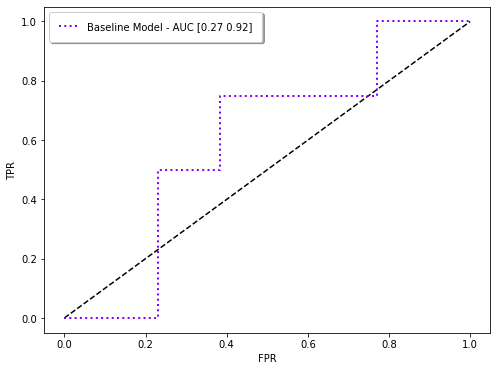

In [1245]:
fig, (ax1) = plt.subplots(1, 1,figsize=(8,6))
# fig.suptitle('Receiver Operating Characteristic')

#############################################
## General VS Specific
#############################################


#ÓBITO AGREGADO E SIMPLES
ax1.set_facecolor('xkcd:white')
ax1.spines['left'].set_color('#000000')
ax1.spines['bottom'].set_color('#000000')
ax1.spines['top'].set_color('#000000')
ax1.spines['right'].set_color('#000000')
# ax1.grid(color='grey', linestyle='solid',alpha=0.3)
ax1.plot([0,1],[0,1], 'k--')


n = 1
#using plasma cmap for each axis
colors = plt.cm.rainbow(np.linspace(0, 1, n))


#ci_baseline = AUC_CI(y_test_baseline["class"], y_pred_prob_baseline)
ci_baseline = AUC_CI(y_test_baseline["class"], preds["Score"])
fpr_baseline , tpr_baseline, thresholds_baseline = roc_curve(y_test_baseline, preds["Score"])


# for i in range(n):

ax1.plot(fpr_baseline, tpr_baseline, label= "Baseline Model - AUC " + str(np.around(ci_baseline,2))
         , color=colors[0], linewidth=2, linestyle=":")

ax1.legend(frameon=True, shadow=True, borderpad=1, facecolor="white")
ax1.set_xlabel("FPR")
ax1.set_ylabel("TPR")

# plt.savefig("sup_fig1.svg")
